In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from utils.data import * 
from utils.models import * 
from utils.train import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
train_loader, test_loader = load_cifar10(batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
criterion = nn.CrossEntropyLoss()

In [10]:
acc_mean, acc_std = statistical_evaluation(TverskyModel, optim.Adam, criterion, 
                                           train_loader, test_loader, device="mps",
                                           model_kwargs={"initialization": "orthogonal",
                                                         "in_channels": 3,
                                                         "in_width": 32})

Round 1/5


100%|██████████| 313/313 [00:01<00:00, 280.30it/s]


Round 1 - Loss: 0.6702, Accuracy: 0.6645
Round 2/5


100%|██████████| 313/313 [00:01<00:00, 275.65it/s]


Round 2 - Loss: 0.6827, Accuracy: 0.6661
Round 3/5


100%|██████████| 313/313 [00:01<00:00, 278.82it/s]


Round 3 - Loss: 2.3026, Accuracy: 0.1000
Round 4/5


100%|██████████| 313/313 [00:01<00:00, 282.65it/s]


Round 4 - Loss: 2.3026, Accuracy: 0.1000
Round 5/5


100%|██████████| 313/313 [00:01<00:00, 278.81it/s]

Round 5 - Loss: 0.7382, Accuracy: 0.6661


In [11]:
print(f"Accuracy: {acc_mean:.4f} ± {acc_std:.4f}")

Accuracy: 0.4393 ± 0.2771


In [ ]:
acc_mean, acc_std = statistical_evaluation(BaseModel, optim.Adam, criterion, 
                                           train_loader, test_loader, device="mps",
                                           model_kwargs={"in_channels": 3,
                                                         "in_width": 32})

In [7]:
print(f"Accuracy: {acc_mean:.4f} ± {acc_std:.4f}")

Accuracy: 0.6723 ± 0.0060


In [5]:
model = TverskyModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [6]:
losses = []

for epoch in range(5):
    with tqdm(train_loader, unit="it") as loop:
        loop.set_description(f"Epoch {epoch+1}")
        for batch in loop:
            x, y = batch
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            loop.set_postfix(loss=loss.item())
            losses.append(loss.item())

Epoch 5: 100%|██████████| 1875/1875 [00:27<00:00, 68.96it/s, loss=0.0173]  


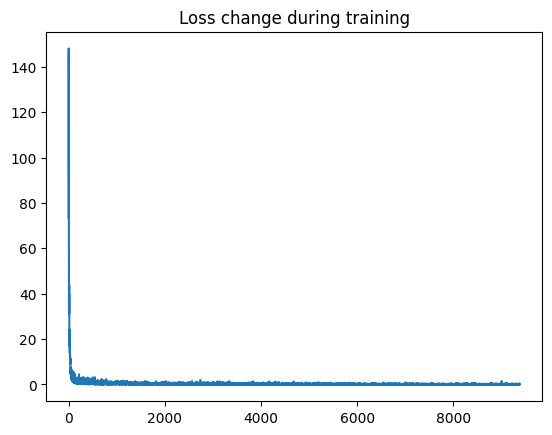

In [7]:
plt.title("Loss change during training")
plt.plot(losses)
plt.show()

In [8]:
with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_loader:
        x, y = batch
        output = model(x)
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 97.88%
